    <a href="https://colab.research.google.com/github/vasconcelosfer/DeepLearning/blob/main/Deep_Learning_TP_Cohorte_16_4B2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Universidad de Buenos Aires
# Deep Learning - TP
# Cohorte 16 - 4to bimestre 2024


El TP comienza al momento de recibir este correo y la ventana de entrega estará abierta hasta **las 20hs del Lunes 21 de octubre**. La resolución es individual. Pueden utilizar los contenidos vistos en clase y otra bibliografía. Si se toman ideas de fuentes externas deben ser correctamente citadas incluyendo el correspondiente link o página de libro.

El formato de entrega debe ser un “link a un colab” (permitir acceso a las siguientes direcciones: alfonsorafel93@gmail.com y lelectronfou@gmail.com) y **se realizará en el siguiente link de google form: [link](https://docs.google.com/forms/d/e/1FAIpQLSc8dLsaaKQxAbtTv5RejE6TxifO_BugdeEU_IdhKl39qMvoMg/viewform?usp=sf_link)**. Tanto los resultados, como el código y las explicaciones deben quedar guardados y visualizables en el colab.

NO ES NECESARIO QUE NOS ENVIEN COREEO AVISANDO DE LA ENTREGA!

**Consideraciones a tener en cuenta:**
- Se entregará 1 solo colab para la totalidad del examen.
- Renombrar el archivo de la siguiente manera: **APELLIDO-NOMBRE-DL-TP Co(numero de cohorte).ipynb**
- Los códigos deben poder ejecutarse.
- Los resultados, cómo el código y las explicaciones deben quedar guardados y visualizables en el correspondiente link.
- Prestar atención a las consignas, responder las preguntas cuando corresponda.


**Condiciones de aprobación**
- Se aprueba con más del 60% del examen bien resuelto de cada parte del TP (Parte 1 y Parte 2).
- La escala de notas empleada por la UBA es aprobado para nota igual o superior a 4.

# Parte 1
Descargar el dataset del siguiente link: https://drive.google.com/file/d/1X8_G5BpQMi-Nnbtms2RL8lcWSxzD8ixd/view?usp=sharing. El dataset son compras de productos que diferentes clientes realizaron durante un black sales. El dataset contiene información sobre las transacciones y el objetivo es poder utilizarlo para crear diferentes modelos que puedan predecir cuánto un cliente está dispuesto a gastar en un producto en el futuro.
- a) Analizar y preparar el dataset.

Particularmente para los puntos b), c) y d) vamos a tratar este problema como una clasificación donde queremos averiguar si el cliente pertenece al grupo 0 (gasta menos de 5000), al grupo 1 (gasta entre 5000 y 10000), al grupo 2 (gasta entre 10000 y 15000) o al grupo 3 (gasta más de 15000).
- b) Entrenar un modelo de deep learning que no utilice embeddings, **descartando el `product_id` y `user_id`.** . Graficar las evoluciones de la funcion de costo y la metrica de validacion. Usar capas de regularizacion en caso de considerar necesario. Explicar resultados obtenidos.
- c)	Entrenar un modelo de deep learning que utilice **2 capas de embeddings**, una para los productos y otra para los usuarios. Graficar las evoluciones de la funcion de costo y la metrica de validacion. Usar capas de regularizacion en caso de considerar necesario. Explicar resultados obtenidos.
- d) Para el modelo del punto c) implementar una funcion que a reciba un id de usuario y sugiera **n** cantidad usuarios que tuvieron un comportamiento de compras similar.

Para el punto e) vamos a considerar un problema de regresion, donde la salida es cuanto gasto el cliente:
- e)	Entrenar un de deep learning que utilice **2 capas de embeddings**, una para los productos y otra para los usuarios. Graficar las evoluciones de la funcion de costo y la metrica de validacion. Usar capas de regularizacion en caso de considerar necesario. Explicar resultados obtenidos.
- f) Para el mejor modelo obtenido en el apartado d) elegir al menos 2 hiperparametros para tunear. Explicar el metodo utilizado y los resultados obtenidos.



In [243]:
from unittest.mock import inplace

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import torch
from sklearn import metrics
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

In [236]:
device = "cpu"
if torch.cuda.is_available():
  device = "cuda:0"

#### a) Analizar y preparar el dataset.

In [289]:
bsales_df = pd.read_csv('dataset_black_sales.csv')

In [205]:
bsales_df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [206]:
bsales_df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [207]:
bsales_df.describe(include=['O'])

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


In [208]:
bsales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


Del análisis inicial observamos que el dataset cuenta con 550068 registros. Tiene 11 atributos y el target Compras (Purchase). A continuación listamos los atributos:

Atributos:

- User_ID: Número de identificación del comprador. Variable del tipo cualitativa nominal.  
- Product_ID: Número de identificación del producto. Variable del tipo cualitativa nominal.
- Gender: Género del comprador. Variable del tipo cualitativa nominal.
- Age: Edad del comprado. Variable del tipo cualitativa ordinal. 
- Occupation: Ocupación del comprador. Variable del tipo cualitativa nominal.  
- City_Category: Categoría de ciudad. Variable del tipo cualitativa nominal.
- Stay_In_Current_City_Years: Años de residencia en la ciudad.  Variable del tipo cualitativa ordinal.  
- Marital_Status: Estado civil del comprador. Variable del tipo cualitativa nominal.  
- Product_Category_1: Categoría de producto. Variable cuantitativa discreta (si bien es un tipo de dato flotante todos los valores son enteros. Entendemos que se encuentra en este tipo de dato por tener valores faltantes).
- Product_Category_2: Categoría de producto. Variable cuantitativa discreta (si bien es un tipo de dato flotante todos los valores son enteros. Entendemos que se encuentra en este tipo de dato por tener valores faltantes).
- Product_Category_3: Categoría de producto. Variable cuantitativa discreta (si bien es un tipo de dato flotante todos los valores son enteros. Entendemos que se encuentra en este tipo de dato por tener valores faltantes).

Target:
- Purchase: Monto gastado. Variable cuantitativa discreta.
NOTA: Dado que los puntos b), c) y d), vamos a entrenar una red para un problema de clasificación. Vamos a crear una columna del tipo cualitativa ordinal para agrupar al cliente en 4 grupos dependiendo del monto gastado.
    - grupo 0 (gasta menos de 5000)
    - grupo 1 (gasta entre 5000 y 10000)
    - grupo 2 (gasta entre 10000 y 15000)
    - grupo 3 (gasta más de 15000)   

In [209]:
bsales_df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

Graficamos histograma de Purchase Category para ver como están balanceadas las categorías:

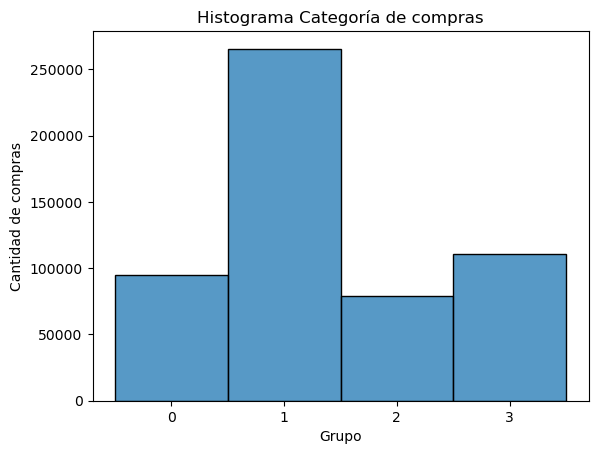

In [211]:
sns.histplot(bsales_df, x=bsales_df['purchase_category'], stat='count', discrete=True)
plt.title('Histograma Categoría de compras')
plt.ylabel('Cantidad de compras')
plt.xlabel('Grupo')
plt.xticks([0,1,2,3])
plt.show()

Como podemos observar hay un desbalanceo ya que hay mas compras del grupo 1.

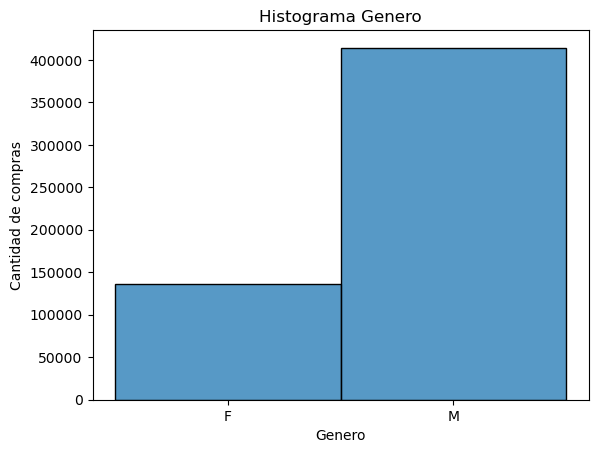

In [212]:
sns.histplot(bsales_df, x=bsales_df['Gender'], stat='count', discrete=True)
plt.title('Histograma Genero')
plt.ylabel('Cantidad de compras')
plt.xlabel('Genero')
# plt.xticks([0,1,2,3])
plt.show()

#### Codificación de variables categoricas

In [213]:
# bsales_df = pd.read_csv('dataset_black_sales.csv')

Mapeamos los generos en 0 y 1:

In [290]:
bsales_df.insert(bsales_df.columns.get_loc('Gender')+1, 'Encode_Gender', bsales_df['Gender'].map({'F':0, 'M':1}))

Codificamos los rangos de edad

In [291]:
bsales_df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [292]:
age_label= ['0-17','18-25','26-35','36-45','46-50', '51-55', '55+']
encoder = OrdinalEncoder(categories=[age_label])
bsales_df.insert(bsales_df.columns.get_loc('Age')+1, 'Encode_Age', encoder.fit_transform(bsales_df[['Age']]))
bsales_df['Encode_Age'] = bsales_df['Encode_Age'].astype(int)

Codificamos las categorías de ciudad con One-Hot Encoding

In [293]:
dummies_bsales_df = pd.get_dummies(bsales_df['City_Category'], columns=['City_Category'], prefix='City').astype(int)
city_category_index = bsales_df.columns.get_loc('City_Category') + 1
bsales_df = pd.concat([bsales_df.iloc[:,:city_category_index], dummies_bsales_df, bsales_df.iloc[:,city_category_index:]], axis=1)

Para el caso de la columna Stay_In_Current_City_Years remplazamos 4+ por 4 y convertimos a int

In [294]:
bsales_df['Stay_In_Current_City_Years']= bsales_df['Stay_In_Current_City_Years'].replace('4+', '4').astype(int)

En el caso de los valores faltantes en Product_Category_2 y Product_Category_3, reemplazamos el valor faltante por -1

In [295]:
bsales_df['Product_Category_2'].fillna(-1, inplace=True)
bsales_df['Product_Category_3'].fillna(-1, inplace=True)

In [296]:
bsales_df['Product_Category_2'] = bsales_df['Product_Category_2'].astype(int)
bsales_df['Product_Category_3'] = bsales_df['Product_Category_3'].astype(int)

Preparamos y dividimos el dataset para entrenar y validar la red neuronal

In [297]:
bsales_df.drop(['Gender', 'Age', 'City_Category'], axis=1, inplace=True)

In [298]:
bsales_df_nn = bsales_df.copy() 

Por último, para los puntos b), c) y d) resulta un problema de clasificación multiclase. Por lo tanto, vamos a crear la columna Pruchase Category con los siguientes valores: 0 (gasta menos de 5000), 1 (gasta entre 5000 y 10000), 2 (gasta entre 10000 y 15000) o 3 (gasta más de 15000).    
Luego aplicamos one hot encondig.

In [299]:
def set_purchase_category(row):
    if row['Purchase'] < 5000:
        return 0
    elif 5000 <= row['Purchase'] < 10000:
        return 1
    elif 10000 <= row['Purchase'] < 15000:
        return 2
    else:
        return 3
    
bsales_df_nn['Purchase_Category'] = bsales_df_nn.apply(set_purchase_category, axis=1)

In [300]:
purchase_category_onehot = pd.get_dummies(bsales_df_nn['Purchase_Category'], columns=['Purchase_Category'], prefix='Group').astype(int)
bsales_df_nn = pd.concat([bsales_df_nn, purchase_category_onehot], axis=1)


In [301]:
bsales_df_nn

,User_ID,Product_ID,Encode_Gender,Encode_Age,Occupation,City_A,City_B,City_C,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Purchase_Category,Group_0,Group_1,Group_2,Group_3
0,1000001,P00069042,0,0,10,1,0,0,2,0,3,-1,-1,8370,1,0,1,0,0
1,1000001,P00248942,0,0,10,1,0,0,2,0,1,6,14,15200,3,0,0,0,1
2,1000001,P00087842,0,0,10,1,0,0,2,0,12,-1,-1,1422,0,1,0,0,0
3,1000001,P00085442,0,0,10,1,0,0,2,0,12,14,-1,1057,0,1,0,0,0
4,1000002,P00285442,1,6,16,0,0,1,4,0,8,-1,-1,7969,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,1,5,13,0,1,0,1,1,20,-1,-1,368,0,1,0,0,0
550064,1006035,P00375436,0,2,1,0,0,1,3,0,20,-1,-1,371,0,1,0,0,0
550065,1006036,P00375436,0,2,15,0,1,0,4,1,20,-1,-1,137,0,1,0,0,0
550066,1006038,P00375436,0,6,1,0,0,1,2,0,20,-1,-1,365,0,1,0,0,0


### b) Entrenar un modelo de deep learning que no utilice embeddings, **descartando el `product_id` y `user_id`.** . Graficar las evoluciones de la funcion de costo y la metrica de validacion. Usar capas de regularizacion en caso de considerar necesario. Explicar resultados obtenidos.

In [304]:
bsales_df_nn_without_embeddings = bsales_df_nn.drop(['User_ID', 'Product_ID', 'Purchase', 'Purchase_Category'], axis=1, inplace=False)

In [306]:
x = bsales_df_nn_without_embeddings.drop(columns=['Group_0', 'Group_1', 'Group_2', 'Group_3']).values
y = bsales_df_nn_without_embeddings[['Group_0', 'Group_1', 'Group_2', 'Group_3']].values

In [309]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.15, random_state=42)

In [310]:
# Pytorch necesita de una clase de dataset que extienda de torch.utils.data.Dataset
# Esta clase dataset debe sobreescribir los métodos init, len y getitem
class PurchaseCategoryDataset(Dataset):
  #__init__ guarda el dataset en una variable de clase
  def __init__(self, x, y):
    self.x = x
    self.y = y

  # __len__ define el comportamiento de la función len() sobre el objeto
  def __len__(self):
    return self.x.shape[0]

  # __getitem__ define el comportamiento de los []
  def __getitem__(self, idx):
    return self.x[idx], self.y[idx]

In [326]:
# Creo el dataset de entrenamiento
train_ds = PurchaseCategoryDataset(x_train, y_train)
# Creo el dataset de validación
valid_ds = PurchaseCategoryDataset(x_valid, y)

# Pytorch utiliza DataLoader para entregar los dataset de a batches
train_dataloader = DataLoader(train_ds, batch_size = 64, shuffle= True)
valid_dataloader = DataLoader(valid_ds, batch_size=64)

In [319]:
x_train.shape

(467557, 11)

In [323]:
# Arquitectura red neuronal
class NNet(torch.nn.Module):

  def __init__(self):
    # Defino la arquitectura de la red
    super().__init__()
    self.linear_1 = torch.nn.Linear(in_features=11, out_features=128, bias=True)
    self.relu_1 = torch.nn.ReLU()
    self.linear_2 = torch.nn.Linear(in_features = 128, out_features=64, bias=True)
    self.relu_2 = torch.nn.ReLU()
    self.linear_3 = torch.nn.Linear(in_features = 64, out_features= 16, bias=True)
    self.output = torch.nn.Linear(in_features = 16, out_features= 4, bias=True)

  def forward(self, x):
    # Defino el cálculo del paso forward
    x = self.linear_1(x)
    x = self.relu_1(x)
    x = self.linear_2(x)
    x = self.relu_2(x)
    x = self.linear_3(x)
    x = self.output(x)
    return x

In [324]:
# Instanciamos la red
nnet = NNet()
# Copio la red neuronal al dispositivo donde entrene la red neuronal
nnet = nnet.to(device)
# Loss
loss_function = torch.nn.CrossEntropyLoss()
    # torch.nn.BCELoss(reduction='sum'))
# Optimizer
optimizer = torch.optim.Adam(nnet.parameters(), lr=0.0001)

In [ ]:
# cantidad de epochs
epochs = 100

n_train = len(train_ds)
n_valid = len(valid_ds)
# Doble loop algoritmo Mini-Batch
for epoch in range(epochs):
  
  ############################################
  ## Entrenamiento
  ############################################
  nnet.train(True)

  epoch_loss = 0
  epoch_y_hat = []
  epoch_y = []
  
  for i,data in enumerate(train_dataloader):
    # Obtengo los datos del batch de entrenamiento
    x_batch, y_batch = data
    # Copio el batch al dispositivo donde entreno la red neuronal
    x_batch = x_batch.to(device).float()
    y_batch = y_batch.to(device).float().reshape(-1, 4)

    # Paso forward
    # Limpio optimizer para empezar un nuevo cálculo de gradiente
    optimizer.zero_grad()
    y_batch_hat = nnet(x_batch)
    
    # Calculo el loss
    loss = loss_function(y_batch_hat,y_batch)

    # Backpropagation
    loss.backward()

    # Actualizar los parámetros
    optimizer.step()

    # Almaceno los valores reales y mis predicciones para cálcular las métricas
    epoch_y += list(y_batch.detach().cpu().numpy())
    epoch_y_hat += list(y_batch_hat.detach().cpu().numpy())
    # Acumulo la loss del batch
    epoch_loss = epoch_loss + loss.item()

  # Calculo la media de la loss
  epoch_loss = epoch_loss / n_train
  # Cálculo la métrica de la epoch
  accuracy = metrics.accuracy_score( np.argmax(epoch_y, axis=1),  np.argmax(epoch_y_hat, axis=1))
  recall = metrics.recall_score(np.argmax(epoch_y, axis=1), np.argmax(epoch_y_hat, axis=1), average='macro')

  ############################################
  ## Validación
  ############################################
  # Desactivo el cálculo de gradiente para validación
  nnet.train(False)

  valid_epoch_loss = 0
  valid_epoch_y_hat = []
  valid_epoch_y = []

  for i,data in enumerate(valid_dataloader):
    # Obtengo los datos del batch de validación
    x_batch, y_batch = data
    # Copio el batch al dispositivo donde entreno la red neuronal
    x_batch = x_batch.to(device).float()
    y_batch = y_batch.to(device).float().reshape(-1, 4)

    # Paso forward
    y_batch_hat = nnet(x_batch)
    
    # Calculo el loss
    loss = loss_function(y_batch_hat, y_batch)

    # En validación no hago backpropagation!!

    # Almaceno los valores reales y mis predicciones para cálcular las métricas
    valid_epoch_y += list(y_batch.detach().cpu().numpy())
    valid_epoch_y_hat += list(y_batch_hat.detach().cpu().numpy())
    # Acumulo la loss del batch
    valid_epoch_loss = valid_epoch_loss + loss.item()

  # Calculo la media de la loss
  valid_epoch_loss = valid_epoch_loss / n_valid
  # Cálculo la métrica de la epoch
  valid_accuracy = metrics.accuracy_score(np.argmax(valid_epoch_y, axis=1), np.argmax(valid_epoch_y_hat, axis=1))
  valid_recall = metrics.recall_score(np.argmax(valid_epoch_y, axis=1), np.argmax(valid_epoch_y_hat, axis=1), average='macro')

  ############################################
  ## Impresión de resultados por epoch
  ############################################
  print(f" Epoch {epoch} | " \
        f"Train/Valid loss: {epoch_loss:.3f} / {valid_epoch_loss:.3f} | " \
        f"Train/Valid accuracy: {accuracy:.3f} / {valid_accuracy:.3f} | " \
        f"Train/Valid recall: {recall:.3f} / {valid_recall:.3f} | ")

 Epoch 0 | Train/Valid loss: 0.012 / 0.038 | Train/Valid accuracy: 0.706 / 0.337 | Train/Valid recall: 0.620 / 0.252 | 
 Epoch 1 | Train/Valid loss: 0.012 / 0.039 | Train/Valid accuracy: 0.706 / 0.341 | Train/Valid recall: 0.621 / 0.252 | 
 Epoch 2 | Train/Valid loss: 0.012 / 0.038 | Train/Valid accuracy: 0.706 / 0.337 | Train/Valid recall: 0.620 / 0.252 | 
 Epoch 3 | Train/Valid loss: 0.012 / 0.038 | Train/Valid accuracy: 0.707 / 0.336 | Train/Valid recall: 0.621 / 0.252 | 
 Epoch 4 | Train/Valid loss: 0.012 / 0.038 | Train/Valid accuracy: 0.707 / 0.338 | Train/Valid recall: 0.621 / 0.251 | 
 Epoch 5 | Train/Valid loss: 0.012 / 0.039 | Train/Valid accuracy: 0.707 / 0.336 | Train/Valid recall: 0.621 / 0.252 | 
 Epoch 6 | Train/Valid loss: 0.012 / 0.040 | Train/Valid accuracy: 0.707 / 0.339 | Train/Valid recall: 0.621 / 0.252 | 
 Epoch 7 | Train/Valid loss: 0.011 / 0.039 | Train/Valid accuracy: 0.707 / 0.342 | Train/Valid recall: 0.621 / 0.252 | 
 Epoch 8 | Train/Valid loss: 0.011 / 0.0

# Parte 2.a

Implemente una arquitectura de red neuronal basada en CNN para identificar del dataset fashion MNIST las 10 clases del mismo. Sobre dicho modelo, realize una exploración de 5 variantes distintas (que se desprenden del modelo propuesto) variando alguno (o varios) de los siguientes hiperparámetros:
- numero de capas.
- numero de kernels.
- tamaño de kernels.


Evalue la evolución de la función de perdida y la accuracy (para train y test) para cada modelo en una gráfica con las curvas de los 5 modelos propuestos. Compare también el tiempo de entrenamiento y peso (tamaño) de cada modelo. Aplique técnicas de regularización para evitar overfitting. Elija el modelo que considera mejor y justifique.
Entregables:
 - Grafica comparativa de función de perdida vs epochs para los 5 modelos.
 - Grafica comparativa de función de accuracy vs epochs para los 5 modelos.
 - Tabla comparativa (o grafico de barras) del tiempo de entrenamiento y pesos de cada modelo.
 - Justificación del modelo elegio (qué consideró para elegir el modelo y bajo qué criterio).



In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [3]:
torch.cuda.is_available()

False

In [ ]:
# Download train data from open datasets.
train_data= datasets.FashionMNIST(root='data', train=True, download=True, transform=ToTensor(),)

# Download test data from open datsets.
test_data=datasets.FashionMNIST(root='data', train=False, download=True, transform=ToTensor(),)


100%|██████████| 26421880/26421880 [00:02<00:00, 12594801.85it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 199486.41it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3758955.28it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 4915155.25it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



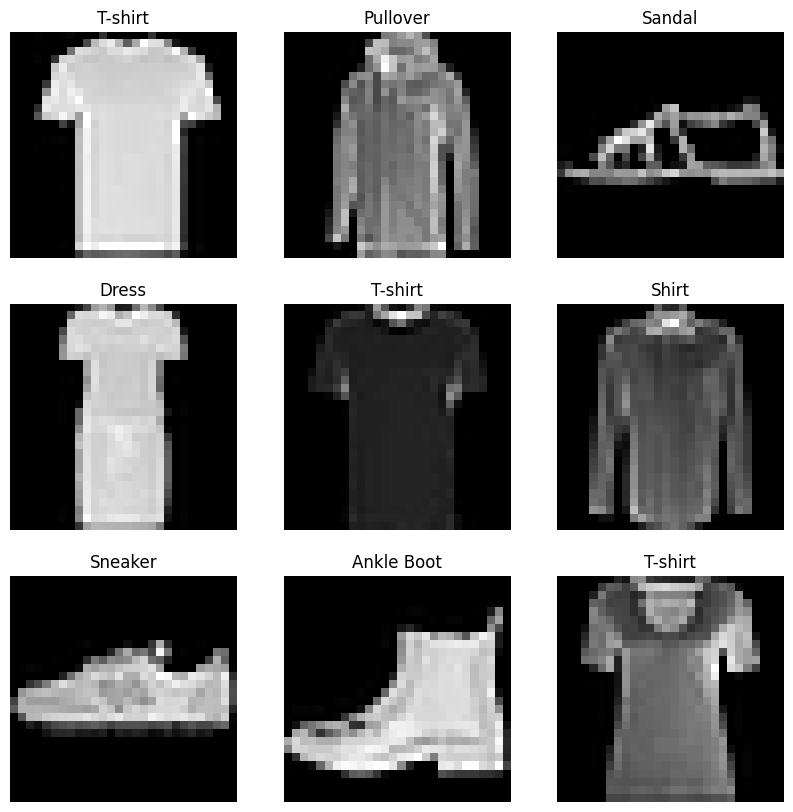

In [ ]:
import matplotlib.pyplot as plt

labels_map={
    0: 'T-shirt',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle Boot',
}

figure = plt.figure(figsize = (10,10))
cols, rows = 3, 3

for i in range (1, cols*rows + 1):
    sample_idx = torch.randint(len(train_data), size = (1,)).item()
    image, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis('off')
    plt.imshow(image.squeeze(), cmap='gray')
plt.show()

# Parte 2.b

Empleando el modelo entrenado y elegido por Ud. en el punto anterior, realice transfer learning para procesar las imágenes del dataset MNIST (los números) **e identificar los números mayores o menores a 4,5**.
Para el entrenamiento emplee solamente 20.000 muestras del set de entrenamiento y valide con el set de testeo. Al reducir el train set, mantenga equilibrada la distribución de las clases.

Elija la estrategia de transfer learning acorde a los visto en la teoría y justifique su elección.

Compare las curvas de entrenamiento y accurracy empleando transfer learning o usando la arquitectura elejida en el punto anterior pero entrenando desde cero.
Entregables:
- Estrategia elegida y su justificación.
- Grafica comparativa de función de perdida vs epochs para el modelo con transfer learning y sin transfer learning.
- Grafica comparativa de función de accuracy vs epochs para el modelo con transfer learning y sin transfer learning.
- Comentarios sobre las curvas graficadas.
